# Overview of GALAH+~DR3, compared with APOGEE DR16 & LAMOST DR5 VAC

## Author(s): Sven Buder (SB, WG4)


### History:
200408 SB Created

In [9]:
# Preamble for notebook 

# Compatibility with Python 3
from __future__ import (absolute_import, division, print_function)

try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# Basic packages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import glob
import sys
import os
import scipy
import pandas as pd
from astropy.table import Table, hstack, vstack, join
from itertools import combinations, product
from tqdm.notebook import tqdm

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy import coordinates

# Matplotlib and associated packages for plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.transforms import Bbox,TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
from matplotlib._png import read_png
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

params = {
    'font.family'        : 'sans',
    'font.size'          : 17,
    'axes.labelsize'     : 20,
    'ytick.labelsize'    : 16,
    'xtick.labelsize'    : 16,
    'legend.fontsize'    : 20,
    'text.usetex'        : True, 
    'text.latex.preamble': [r'\usepackage{upgreek}', r'\usepackage{amsmath}'],
    }   
plt.rcParams.update(params)

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

parula = ListedColormap(_parula_data, name='parula')
parula_zero = _parula_data[0]
parula_0 = ListedColormap(_parula_data, name='parula_0')
parula_0.set_bad((1,1,1))
parula_r = ListedColormap(_parula_data[::-1], name='parula_r')

willi_blau = [0.0722666667, 0.4886666667, 0.8467]

In [4]:
# Setup for galpy

import galpy
from galpy.potential import MWPotential2014 as pot
from galpy.actionAngle import actionAngleStaeckel
from galpy.util import bovy_coords

#galpy scale units:                                                                                                                                                                                         
_REFR0 = 8.178 #[kpc] --> galpy length unit, reference: https://arxiv.org/abs/1904.05721                                                                                                                                                   
_REFV0 = 229. #[km/s] --> galpy velocity unit, reference: https://arxiv.org/abs/1810.09466

aAS = actionAngleStaeckel(
        pot   = pot,        #potential                                                                                                                                                                      
        delta = 0.45,       #focal length of confocal coordinate system                                                                                                                            
        c     = True        #use C code (for speed)                                                                                                                                                         
        )

print("galpy scale units are _REFR0 = "+str(_REFR0)+" kpc and _REFV0 = "+str(_REFV0)+" km/s.")
print("The Sun has an angular momentum of "+str(_REFR0 * _REFV0)+" kpc km/s in this action framework with MWPotential2014")

#Galactocentric position of the Sun according to Gravity Collaboration / Bland-Hawthorn & Gerhard (2016)
X_gc_sun_kpc = _REFR0 #[kpc]
Z_gc_sun_kpc = 0.025 #[kpc]

print(r"We place Sgr A at (x; y; z) = (R_0; 0; z_0) kpc, where")
print("R_0 = "+str(X_gc_sun_kpc)+" kpc and z_0 = "+str(Z_gc_sun_kpc)+" pc (Bland-Hawthorn & Gerhard, 2016)")

#Velocity of the Sun w.r.t. the Local Standard of Rest (e.g. Schoenrich et al. 2009):
U_LSR_kms = 11.1  # [km/s]
V_LSR_kms = 12.24 # [km/s]
W_LSR_kms = 7.25  # [km/s]

#Galactocentric velocity of the Sun:                                                                                                                                                                        
vX_gc_sun_kms = -U_LSR_kms           # = -U              [km/s]
vY_gc_sun_kms =  V_LSR_kms+_REFV0    # = V+v_circ(R_Sun) [km/s]
vZ_gc_sun_kms =  W_LSR_kms           # = W               [km/s]

print("The Sun's velocity with respect to a co-located particle on a circular orbit is")
print("V_LSR = (U_sun, V_sun, W_sun) = ("+str(vX_gc_sun_kms)+", "+str(vY_gc_sun_kms-_REFV0)+", "+str(vZ_gc_sun_kms)+") km/s (Schoenrich 2012)")

galpy scale units are _REFR0 = 8.178 kpc and _REFV0 = 229.0 km/s.
The Sun has an angular momentum of 1872.7620000000002 kpc km/s in this action framework with MWPotential2014
We place Sgr A at (x; y; z) = (R_0; 0; z_0) kpc, where
R_0 = 8.178 kpc and z_0 = 0.025 pc (Bland-Hawthorn & Gerhard, 2016)
The Sun's velocity with respect to a co-located particle on a circular orbit is
V_LSR = (U_sun, V_sun, W_sun) = (-11.1, 12.240000000000009, 7.25) km/s (Schoenrich 2012)


In [129]:
dr3 = Table.read('../../catalogs/GALAH_DR3_main.fits')
dr3_vac_dyn = Table.read('../../catalogs/GALAH_DR3_VAC_dynamics.fits')
apogee = Table.read('../../../Surveys/APOGEE_DR16.fits')
#lamost = Table.read('../../../Surveys/LAMOST_DR5_VAC_Xiang/DD-PayneG_LMDR5.fits')
lamost_vac = Table.read('../../../Surveys/LAMOST_DR5_VAC_Xiang/DD-PayneA_LMDR5.fits')
lamost_gaia = Table.read('../../../Surveys/LAMOST_DR5_VAC_Xiang/DD-Payne_GaiaDR2.fits')
lamost = join(lamost_vac, lamost_gaia, keys='SPECID')

In [130]:
good_galah = (
    (dr3['flag_sp'] == 0) &
    (dr3['flag_alpha_fe'] == 0)
)

good_apogee = (
    (apogee['ASPCAPFLAG'] == 0) &
    (apogee['ALPHA_M'] > -10)&
    (apogee['FE_H'] > -10)
)

good_lamost = (
    (lamost['FLAG_SINGLESTAR'] == 'YES') &
    (lamost['QFLAG_CHI2'] == 'good') &
    (
        (lamost['SNR_G'] > 30) |
        (lamost['SNR_R'] > 30) |
        (lamost['SNR_I'] > 30)
    )
)

In [186]:
# Compute GALAH RZ XY coordinates

galah_finite = np.isfinite(dr3['r_est'])

#setup frame object:
icrs = coordinates.ICRS(ra=dr3['ra'][galah_finite]*u.deg, 
                  dec=dr3['dec'][galah_finite]*u.deg, 
                  distance=dr3['r_est'][galah_finite]*u.pc, 
                  pm_ra_cosdec=dr3['pmra'][galah_finite]*u.mas/u.yr, 
                  pm_dec=dr3['pmdec'][galah_finite]*u.mas/u.yr, 
                  radial_velocity=dr3['rv_galah'][galah_finite]*u.km/u.s)

#setup representation frame:
gc = coordinates.Galactocentric(galcen_distance=np.sqrt(X_gc_sun_kpc**2+Z_gc_sun_kpc**2)*u.kpc,
                          galcen_v_sun=coordinates.CartesianDifferential([-vX_gc_sun_kms,vY_gc_sun_kms,vZ_gc_sun_kms]*u.km/u.s),
                          z_sun=Z_gc_sun_kpc*u.kpc)
galcen = icrs.transform_to(gc)

#Galactocentric Cartesian coordinates:
galah_x_kpc = galcen.x.to(u.kpc).value
galah_y_kpc = galcen.y.to(u.kpc).value

#Galactocentric Cartesian velocities:
galah_u_kms = galcen.v_x.to(u.km/u.s).value
galah_v_kms = galcen.v_y.to(u.km/u.s).value
galah_w_kms = galcen.v_z.to(u.km/u.s).value

#change to Galactocentric cylindrical coordinates:
galcen.set_representation_cls(coordinates.CylindricalRepresentation,s=coordinates.CylindricalDifferential)

galah_R_kpc   = galcen.rho.to(u.kpc).value
galah_phi_rad = galcen.phi.to(u.rad).value
galah_z_kpc   = galcen.z.to(u.kpc).value

In [159]:
# Compute APOGEE RZ XY coordinates

apogee_finite = (apogee['GAIA_R_EST'] >= 0)

#setup frame object:
icrs = coordinates.ICRS(ra=apogee['RA'][apogee_finite]*u.deg, 
                  dec=apogee['DEC'][apogee_finite]*u.deg, 
                  distance=apogee['GAIA_R_EST'][apogee_finite]*u.pc, 
                  pm_ra_cosdec=apogee['GAIA_PMRA'][apogee_finite]*u.mas/u.yr, 
                  pm_dec=apogee['GAIA_PMDEC'][apogee_finite]*u.mas/u.yr, 
                  radial_velocity=apogee['VHELIO_AVG'][apogee_finite]*u.km/u.s)

#setup representation frame:
gc = coordinates.Galactocentric(galcen_distance=np.sqrt(X_gc_sun_kpc**2+Z_gc_sun_kpc**2)*u.kpc,
                          galcen_v_sun=coordinates.CartesianDifferential([-vX_gc_sun_kms,vY_gc_sun_kms,vZ_gc_sun_kms]*u.km/u.s),
                          z_sun=Z_gc_sun_kpc*u.kpc)
galcen = icrs.transform_to(gc)

#Galactocentric Cartesian coordinates:
apogee_x_kpc = galcen.x.to(u.kpc).value
apogee_y_kpc = galcen.y.to(u.kpc).value

#Galactocentric Cartesian velocities:
u_kms = galcen.v_x.to(u.km/u.s).value
v_kms = galcen.v_y.to(u.km/u.s).value
w_kms = galcen.v_z.to(u.km/u.s).value

#change to Galactocentric cylindrical coordinates:
galcen.set_representation_cls(coordinates.CylindricalRepresentation,s=coordinates.CylindricalDifferential)

apogee_R_kpc   = galcen.rho.to(u.kpc).value
apogee_phi_rad = galcen.phi.to(u.rad).value
apogee_z_kpc   = galcen.z.to(u.kpc).value

In [169]:
# Compute LAMOST RZ XY coordinates

lamost_finite = (lamost['r_est'] >= 0)

#setup frame object:
icrs = coordinates.ICRS(ra=np.array(lamost['RA'][lamost_finite])*u.deg, 
                  dec=np.array(lamost['DEC'][lamost_finite])*u.deg, 
                  distance=np.array(lamost['r_est'][lamost_finite])*u.pc, 
                  pm_ra_cosdec=np.array(lamost['pmra'][lamost_finite])*u.mas/u.yr, 
                  pm_dec=np.array(lamost['pmdec'][lamost_finite])*u.mas/u.yr, 
                  radial_velocity=np.array(lamost['RV'][lamost_finite])*u.km/u.s)

#setup representation frame:
gc = coordinates.Galactocentric(galcen_distance=np.sqrt(X_gc_sun_kpc**2+Z_gc_sun_kpc**2)*u.kpc,
                          galcen_v_sun=coordinates.CartesianDifferential([-vX_gc_sun_kms,vY_gc_sun_kms,vZ_gc_sun_kms]*u.km/u.s),
                          z_sun=Z_gc_sun_kpc*u.kpc)
galcen = icrs.transform_to(gc)

#Galactocentric Cartesian coordinates:
lamost_x_kpc = galcen.x.to(u.kpc).value
lamost_y_kpc = galcen.y.to(u.kpc).value

#Galactocentric Cartesian velocities:
u_kms = galcen.v_x.to(u.km/u.s).value
v_kms = galcen.v_y.to(u.km/u.s).value
w_kms = galcen.v_z.to(u.km/u.s).value

#change to Galactocentric cylindrical coordinates:
galcen.set_representation_cls(coordinates.CylindricalRepresentation,s=coordinates.CylindricalDifferential)

lamost_R_kpc   = galcen.rho.to(u.kpc).value
lamost_phi_rad = galcen.phi.to(u.rad).value
lamost_z_kpc   = galcen.z.to(u.kpc).value

In [238]:
def plot_GAL_kiel(f, ax1, ax2, ax3):

    teff_bins = (3000,8100)
    logg_bins = (-0.5,5.5)

    kwargs_hist = dict(cmap=parula, bins=(np.linspace(teff_bins[0],teff_bins[1],100),np.linspace(logg_bins[0],logg_bins[1],100)))

    p,x,y,s1 = ax1.hist2d(
        dr3['teff'][good_galah],
        dr3['logg'][good_galah],
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s2 = ax2.hist2d(
        apogee['TEFF'][good_apogee],
        apogee['LOGG'][good_apogee],
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s3 = ax3.hist2d(
        lamost['TEFF'][good_lamost],
        lamost['LOGG'][good_lamost],
        norm=LogNorm(),cmin=10,
        **kwargs_hist
    )
    ax1.set_xlim(teff_bins[1],teff_bins[0])
    ax2.set_xlim(teff_bins[1],teff_bins[0])
    ax3.set_xlim(teff_bins[1],teff_bins[0])

    ax1.set_ylim(logg_bins[1],logg_bins[0])
    ax2.set_ylim(logg_bins[1],logg_bins[0])
    ax3.set_ylim(logg_bins[1],logg_bins[0])

    ax1.set_title('GALAH+~DR3',fontsize=25)
    ax2.set_title('APOGEE DR16',fontsize=25)
    ax3.set_title('LAMOST DR5 VAC',fontsize=25)

    ax1.set_xlabel(r'$T_\text{eff}$')
    ax2.set_xlabel(r'$T_\text{eff}$')
    ax3.set_xlabel(r'$T_\text{eff}$')

    ax1.set_ylabel(r'$\log g$')
#     ax2.set_ylabel(r'$\log g$')
#     ax3.set_ylabel(r'$\log g$')

    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c3 = plt.colorbar(s3, ax=ax3, extend='min')
#     c1.set_label('Nr. Spectra')
#     c2.set_label('Nr. Spectra')
    c3.set_label('Nr. Spectra')

    plt.tight_layout()
    
#     plt.savefig('../../dr3_release_paper/figures/GAL_kiel.png',dpi=300,bbox_inches='tight')

    return(f)

In [239]:
def plot_GAL_alpha(f, ax1, ax2, ax3):

    feh_bins = (-2.5,0.8)
    alpha_bins = (-0.4,0.7)

    kwargs_hist = dict(cmap=parula, bins=(np.linspace(feh_bins[0],feh_bins[1],100),np.linspace(alpha_bins[0],alpha_bins[1],100)))

    p,x,y,s1 = ax1.hist2d(
        dr3['fe_h'][good_galah],
        dr3['alpha_fe'][good_galah],
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s2 = ax2.hist2d(
        apogee['FE_H'][good_apogee],
        apogee['ALPHA_M'][good_apogee] + apogee['M_H'][good_apogee] - apogee['FE_H'][good_apogee],
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s3 = ax3.hist2d(
        lamost['FEH'][good_lamost],
        lamost['ALPHA_FE'][good_lamost],
        norm=LogNorm(),cmin=10,
        **kwargs_hist
    )
    ax1.set_xlim(feh_bins[0],feh_bins[1])
    ax2.set_xlim(feh_bins[0],feh_bins[1])
    ax3.set_xlim(feh_bins[0],feh_bins[1])

    ax1.set_ylim(alpha_bins[0],alpha_bins[1])
    ax2.set_ylim(alpha_bins[0],alpha_bins[1])
    ax3.set_ylim(alpha_bins[0],alpha_bins[1])

#     ax1.set_title('GALAH+~DR3',fontsize=25)
#     ax2.set_title('APOGEE DR16',fontsize=25)
#     ax3.set_title('LAMOST DR5 VAC',fontsize=25)

    ax1.set_xlabel(r'[Fe/H]')
    ax2.set_xlabel(r'[Fe/H]')
    ax3.set_xlabel(r'[Fe/H]')

    ax1.set_ylabel(r'[$\alpha$/Fe]')
#     ax2.set_ylabel(r'[$\alpha$/Fe]')
#     ax3.set_ylabel(r'[$\alpha$/Fe]')

    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c3 = plt.colorbar(s3, ax=ax3, extend='min')
#     c1.set_label('Nr. Spectra')
#     c2.set_label('Nr. Spectra')
    c3.set_label('Nr. Spectra')

    line_kwargs = dict(c='r',ls='dashed',lw=1)

    ax1.axhline(0,**line_kwargs)
    ax2.axhline(0,**line_kwargs)
    ax3.axhline(0,**line_kwargs)

    ax1.axvline(0,**line_kwargs)
    ax2.axvline(0,**line_kwargs)
    ax3.axvline(0,**line_kwargs)

    plt.tight_layout()
#     plt.savefig('../../dr3_release_paper/figures/GAL_alpha.png',dpi=300,bbox_inches='tight')
    return(f)

In [240]:
def plot_GALAH_xy(f, ax1, ax2, ax3):

    x_bins = (-20,10)
    y_bins = (-15,15)

    kwargs_hist = dict(cmap=parula, bins=(np.linspace(x_bins[0],x_bins[1],100),np.linspace(y_bins[0],y_bins[1],100)))

    p,x,y,s1 = ax1.hist2d(
        galah_x_kpc,
        galah_y_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s2 = ax2.hist2d(
        apogee_x_kpc,
        apogee_y_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s3 = ax3.hist2d(
        lamost_x_kpc,
        lamost_y_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )

#     ax1.set_title('GALAH+~DR3',fontsize=25)
#     ax2.set_title('APOGEE DR16',fontsize=25)
#     ax3.set_title('LAMOST DR5 VAC',fontsize=25)

    ax1.set_xlabel(r'$\mathrm{X_{GC}}$ [kpc]')
    ax2.set_xlabel(r'$\mathrm{X_{GC}}$ [kpc]')
    ax3.set_xlabel(r'$\mathrm{X_{GC}}$ [kpc]')

    ax1.set_ylabel(r'$\mathrm{Y_{GC}}$ [kpc]')
#     ax2.set_ylabel(r'$\mathrm{Y_{GC}}$ [kpc]')
#     ax3.set_ylabel(r'$\mathrm{Y_{GC}}$ [kpc]')

    ax1.set_xlim(x_bins[0],x_bins[1])
    ax2.set_xlim(x_bins[0],x_bins[1])
    ax3.set_xlim(x_bins[0],x_bins[1])

    ax1.set_ylim(y_bins[0],y_bins[1])
    ax2.set_ylim(y_bins[0],y_bins[1])
    ax3.set_ylim(y_bins[0],y_bins[1])

    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c3 = plt.colorbar(s3, ax=ax3)
#     c1.set_label('Nr. Spectra')
#     c2.set_label('Nr. Spectra')
    c3.set_label('Nr. Spectra')

    line_kwargs = dict(c='r',ls='dashed',lw=1)

    ax1.axhline(0,**line_kwargs)
    ax2.axhline(0,**line_kwargs)
    ax3.axhline(0,**line_kwargs)

    ax1.axvline(-_REFR0,**line_kwargs)
    ax2.axvline(-_REFR0,**line_kwargs)
    ax3.axvline(-_REFR0,**line_kwargs)

    plt.tight_layout()
#     plt.savefig('../../dr3_release_paper/figures/GAL_xy.png',dpi=300,bbox_inches='tight')

    return(f)

In [241]:
def plot_GAL_rz(f, ax1, ax2, ax3):

    R_bins = (-1,20)
    z_bins = (-10,10)

    kwargs_hist = dict(cmap=parula, bins=(np.linspace(R_bins[0],R_bins[1],100),np.linspace(z_bins[0],z_bins[1],100)))

    p,x,y,s1 = ax1.hist2d(
        galah_R_kpc,
        galah_z_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s2 = ax2.hist2d(
        apogee_R_kpc,
        apogee_z_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )
    p,x,y,s3 = ax3.hist2d(
        lamost_R_kpc,
        lamost_z_kpc,
        norm=LogNorm(),cmin=1,
        **kwargs_hist
    )

#     ax1.set_title('GALAH+~DR3',fontsize=25)
#     ax2.set_title('APOGEE DR16',fontsize=25)
#     ax3.set_title('LAMOST DR5 VAC',fontsize=25)

    ax1.set_xlabel(r'$\mathrm{R_{GC}}$ [kpc]')
    ax2.set_xlabel(r'$\mathrm{R_{GC}}$ [kpc]')
    ax3.set_xlabel(r'$\mathrm{R_{GC}}$ [kpc]')

    ax1.set_ylabel(r'$\mathrm{z_{GC}}$ [kpc]')
#     ax2.set_ylabel(r'$\mathrm{z_{GC}}$ [kpc]')
#     ax3.set_ylabel(r'$\mathrm{z_{GC}}$ [kpc]')

    ax1.set_xlim(R_bins[0],R_bins[1])
    ax2.set_xlim(R_bins[0],R_bins[1])
    ax3.set_xlim(R_bins[0],R_bins[1])

    ax1.set_ylim(z_bins[0],z_bins[1])
    ax2.set_ylim(z_bins[0],z_bins[1])
    ax3.set_ylim(z_bins[0],z_bins[1])

    c1 = plt.colorbar(s1, ax=ax1)
    c2 = plt.colorbar(s2, ax=ax2)
    c3 = plt.colorbar(s3, ax=ax3)
#     c1.set_label('Nr. Spectra')
#     c2.set_label('Nr. Spectra')
    c3.set_label('Nr. Spectra')

    line_kwargs = dict(c='r',ls='dashed',lw=1)

    ax1.axhline(0,**line_kwargs)
    ax2.axhline(0,**line_kwargs)
    ax3.axhline(0,**line_kwargs)

    ax1.axvline(_REFR0,**line_kwargs)
    ax2.axvline(_REFR0,**line_kwargs)
    ax3.axvline(_REFR0,**line_kwargs)

    plt.tight_layout()
#     plt.savefig('../../dr3_release_paper/figures/GAL_rz.png',dpi=300,bbox_inches='tight')

    return(f)

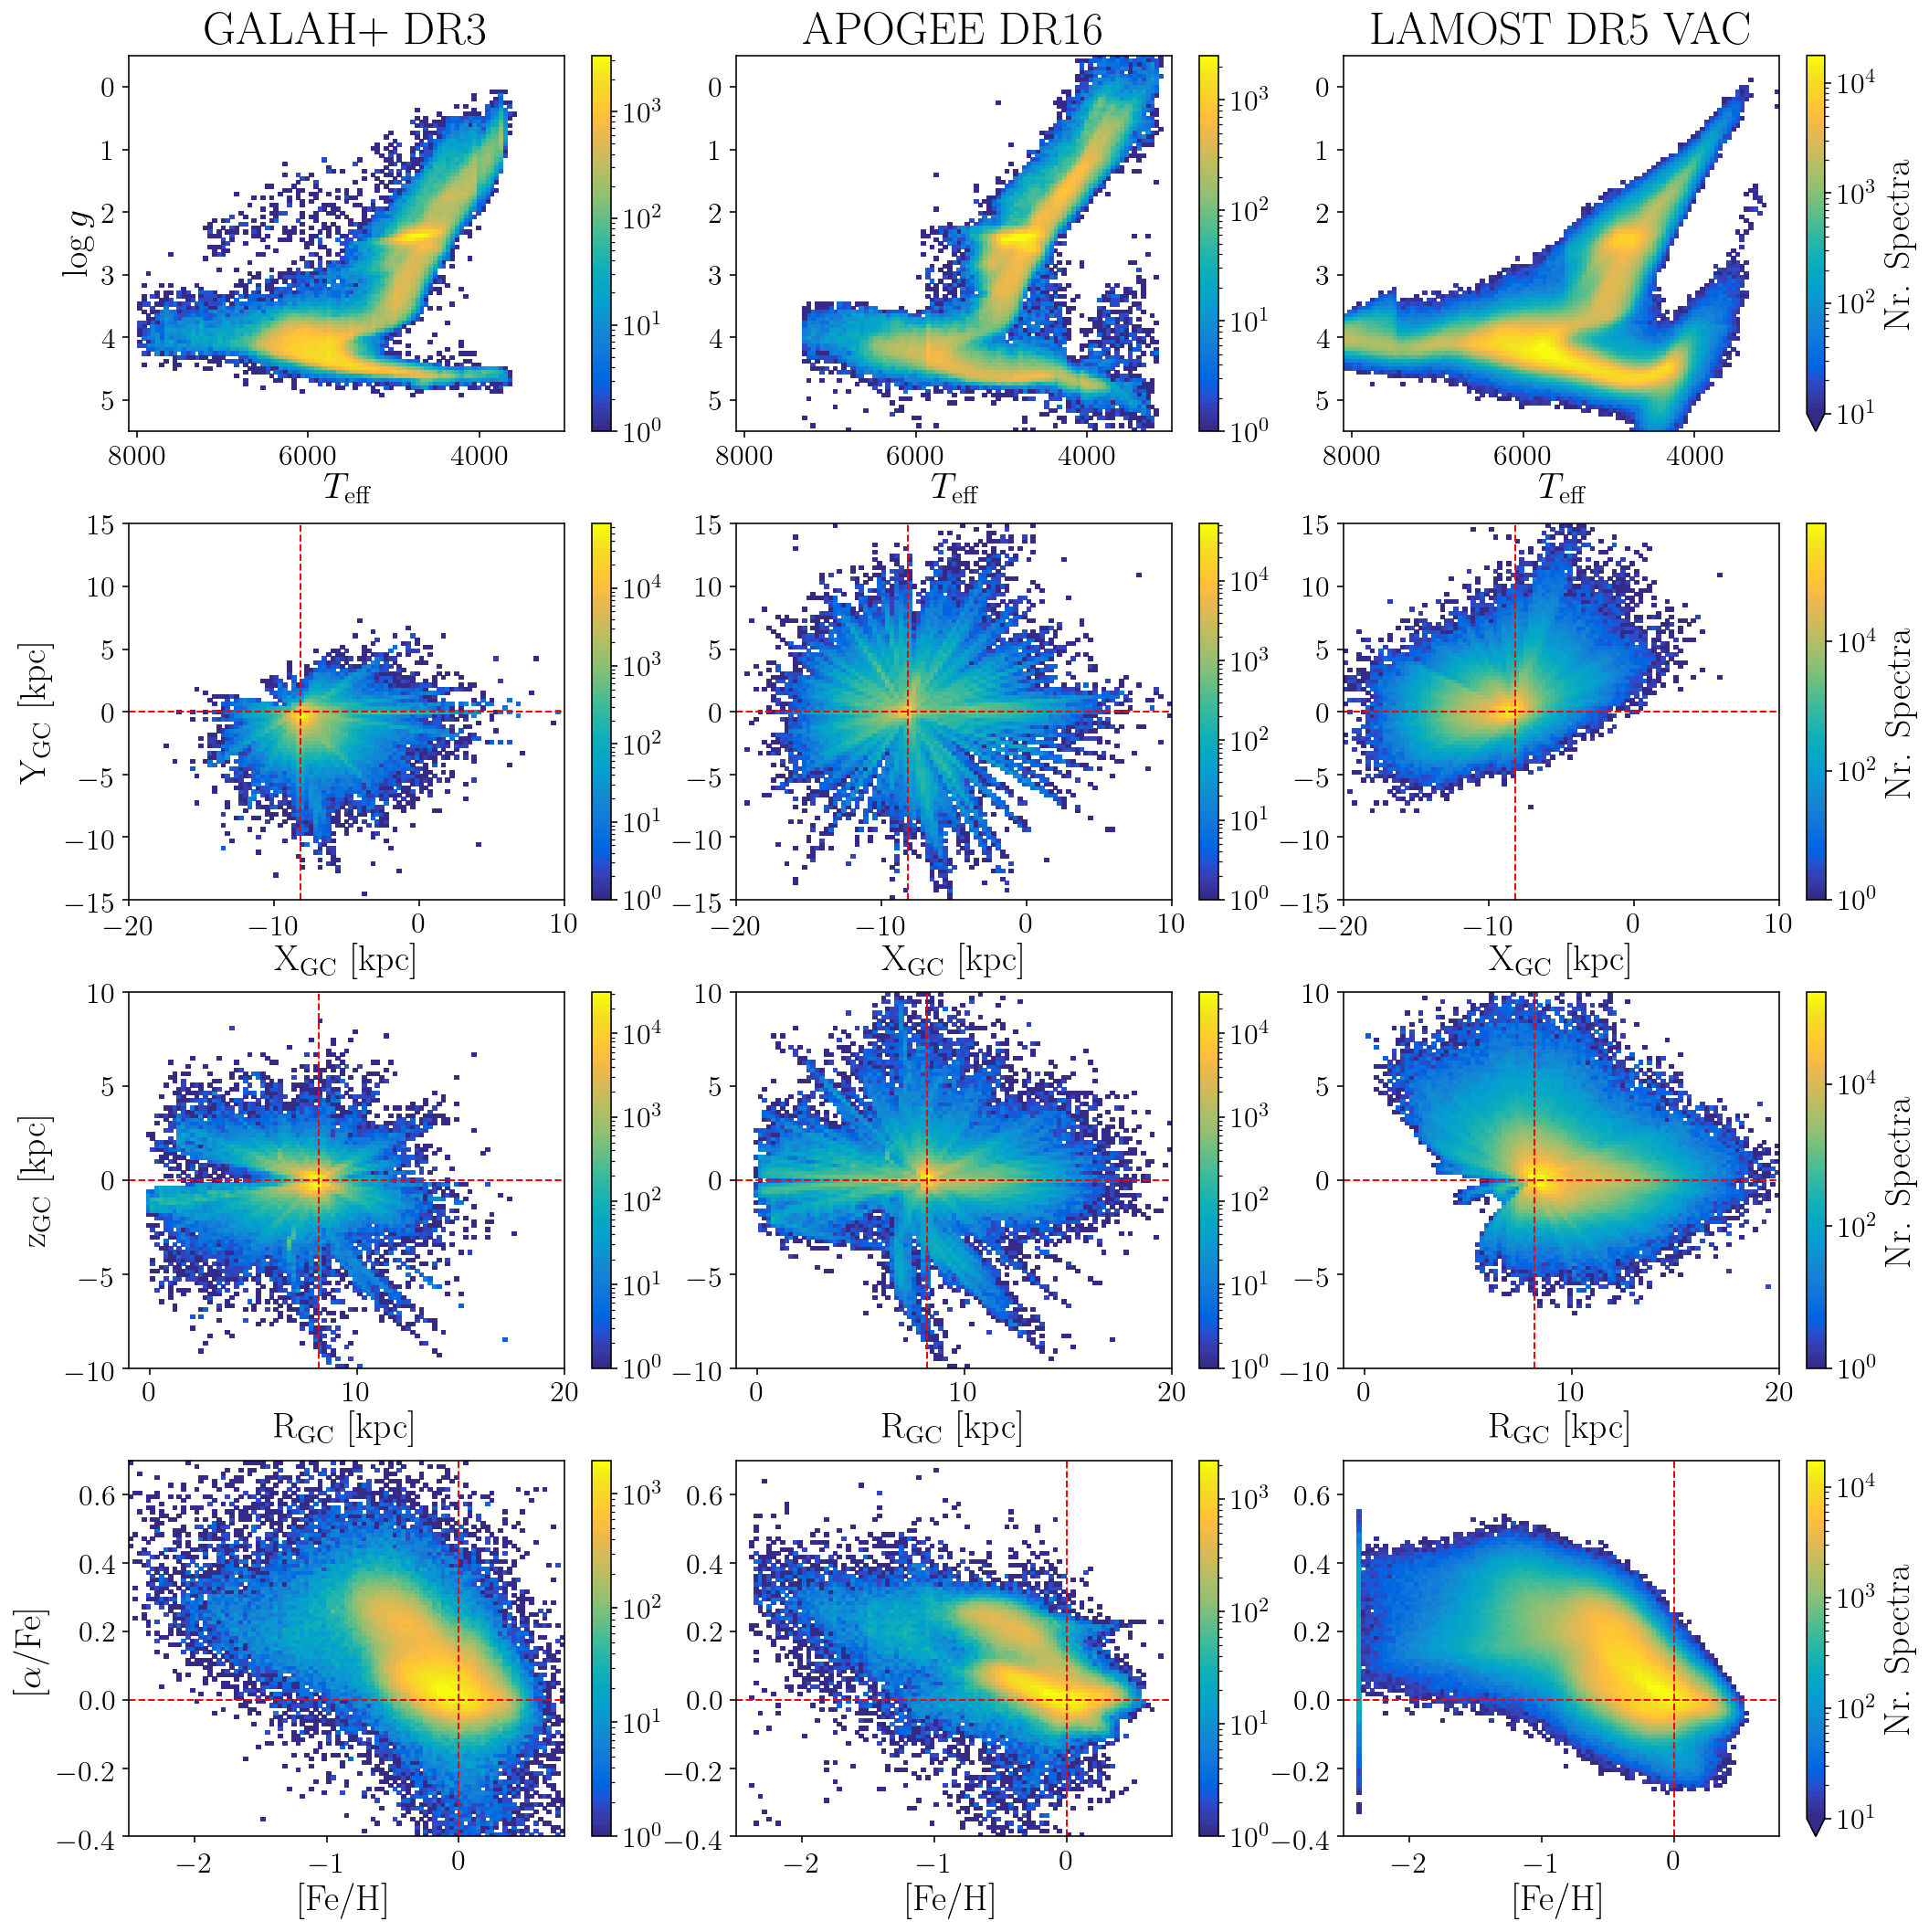

In [242]:
f, ((ax1, ax2, ax3),(ax12, ax22, ax32),(ax13, ax23, ax33),(ax14, ax24, ax34)) = plt.subplots(4,3,figsize=(15,15))

f = plot_GAL_kiel(f, ax1, ax2, ax3)
f = plot_GALAH_xy(f, ax12, ax22, ax32)
f = plot_GAL_rz(f, ax13, ax23, ax33)
f = plot_GAL_alpha(f, ax14, ax24, ax34)
plt.tight_layout(h_pad=0,w_pad=0)
plt.savefig('../../dr3_release_paper/figures/GALAHDR3_APOGEEDR16_LAMOSTDR5VAC.png',dpi=300,bbox_inches='tight')

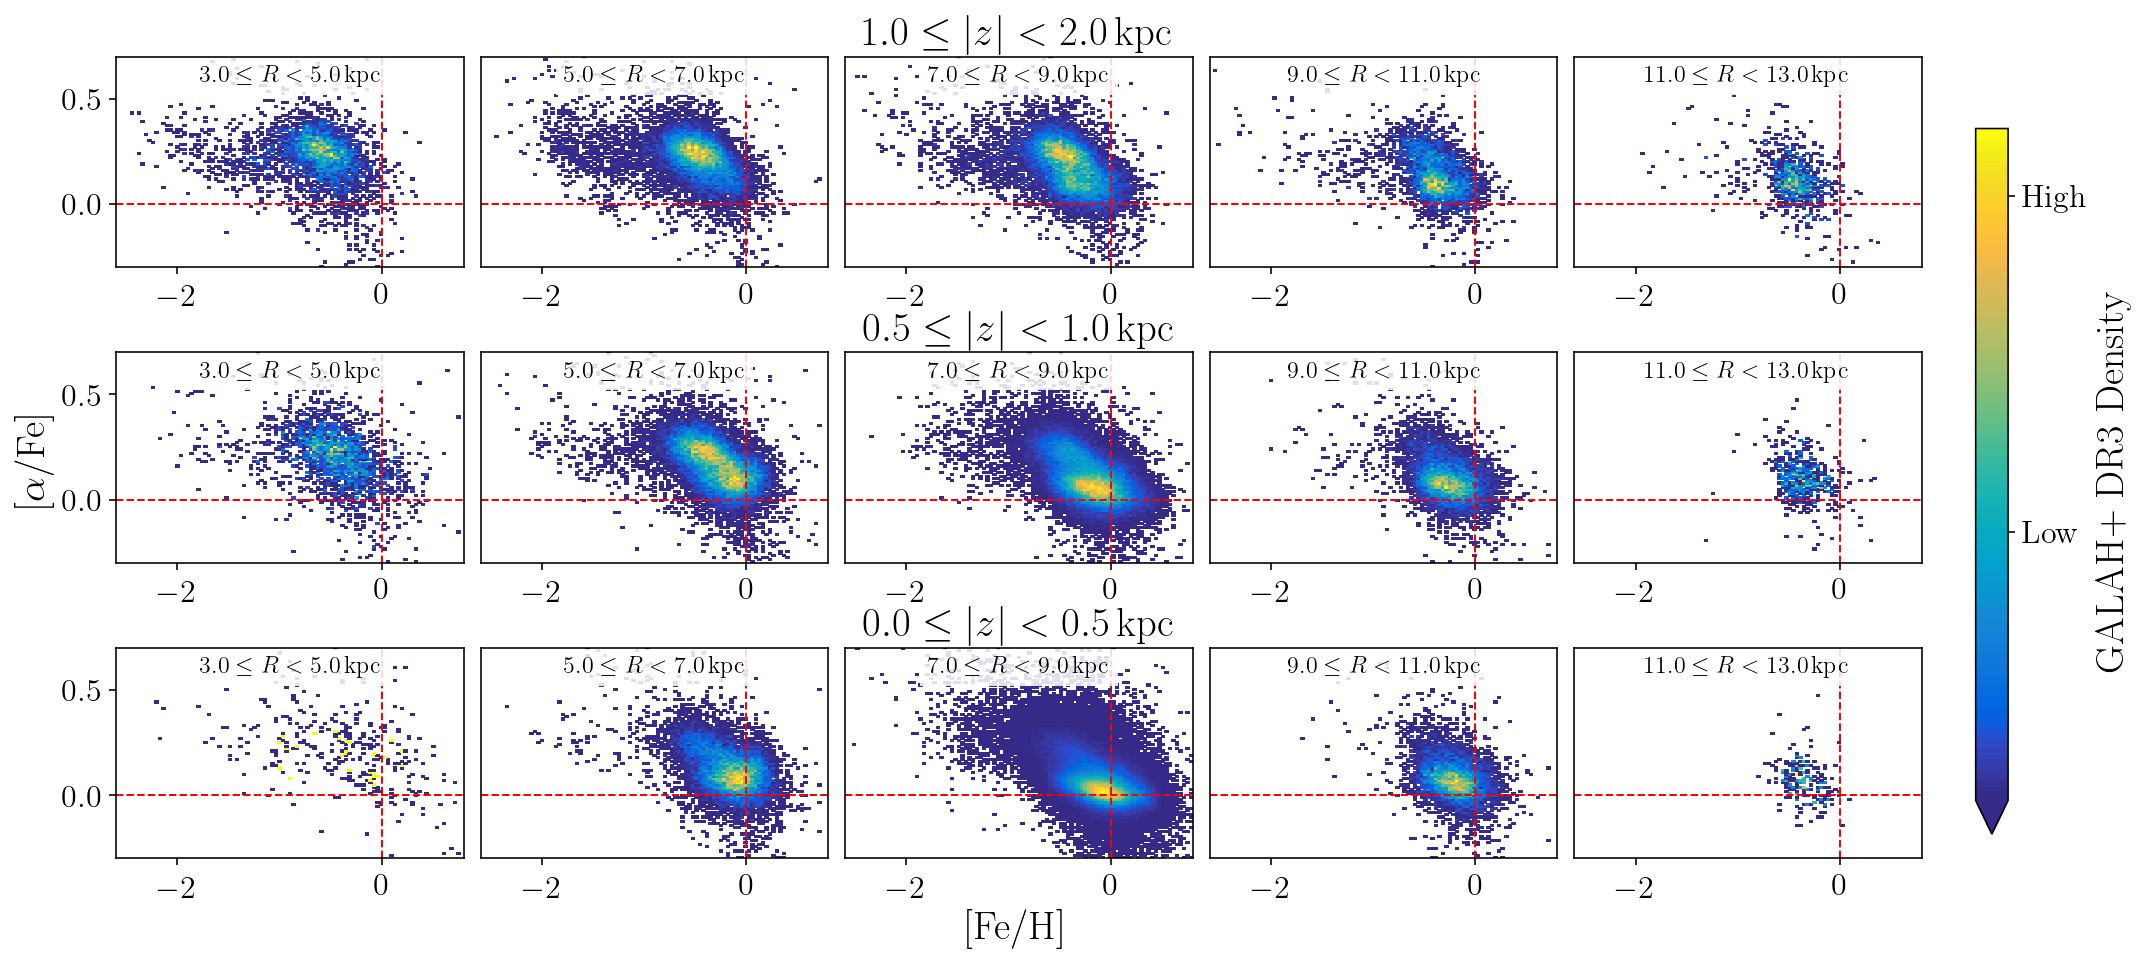

In [184]:
def plot_Rz_fehalpha():

    f, gs = plt.subplots(3,5,figsize=(15,7))

    for row,(z_min,z_max) in enumerate(zip([0,0.5,1.0],[0.5,1.0,2.0])):
    
        for col,(r_min,r_max) in enumerate(zip(np.arange(3,11.1,2),np.arange(5,13.1,2))):
    
            ax=gs[2-row,col]

            in_bin = (
                (dr3['flag_sp'][galah_finite] == 0) &
                (dr3['flag_alpha_fe'][galah_finite] == 0) &
                (galah_R_kpc >= r_min) &
                (galah_R_kpc < r_max) &
                (np.abs(galah_z_kpc) >= z_min) &
                (np.abs(galah_z_kpc) < z_max)
                )
        
            p,x,y,s = ax.hist2d(
                dr3['fe_h'][galah_finite][in_bin],
                dr3['alpha_fe'][galah_finite][in_bin],
                bins = (
                    np.linspace(-2.6,0.8,100),
                    np.linspace(-0.3,0.7,100)
                ),
                cmin=1,cmap=parula
            )
            props = dict(facecolor='w', edgecolor='None', alpha=0.85)   
            ax.text(0.5,0.878,r'$'+"{:.1f}".format(r_min)+' \leq R < '+"{:.1f}".format(r_max)+'\,\mathrm{kpc}$',fontsize=12,transform=ax.transAxes,ha='center',bbox=props)
            if col != 0:
                ax.set_yticks([])
            if ((row == 0) & (col == 2)):
                ax.set_xlabel(r'[Fe/H]')
            if ((row == 1) & (col == 0)):
                ax.set_ylabel(r'[$\alpha$/Fe]')
            if col == 2:
                ax.set_title(r'$'+"{:.1f}".format(z_min)+' \leq \\vert z \\vert < '+"{:.1f}".format(z_max)+'\,\mathrm{kpc}$')

            kwargs_axv = dict(c='r',ls='dashed',lw=1,zorder=2)
            ax.axvline(0,**kwargs_axv)
            ax.axhline(0,**kwargs_axv)

    plt.tight_layout(h_pad=0,w_pad=0)
    f.subplots_adjust(right=0.9)
    cbar_ax = f.add_axes([0.925, 0.15, 0.015, 0.7])
    c = f.colorbar(s, cax=cbar_ax,extend='min')
    c.ax.locator_params(nbins=3)
    c.ax.set_yticklabels(['Low', 'High'])
    c.set_label('GALAH+~DR3~Density')
    
    plt.savefig('../../dr3_release_paper/figures/RZ_alpha.png',bbox_inches='tight',dpi=200)

plot_Rz_fehalpha()

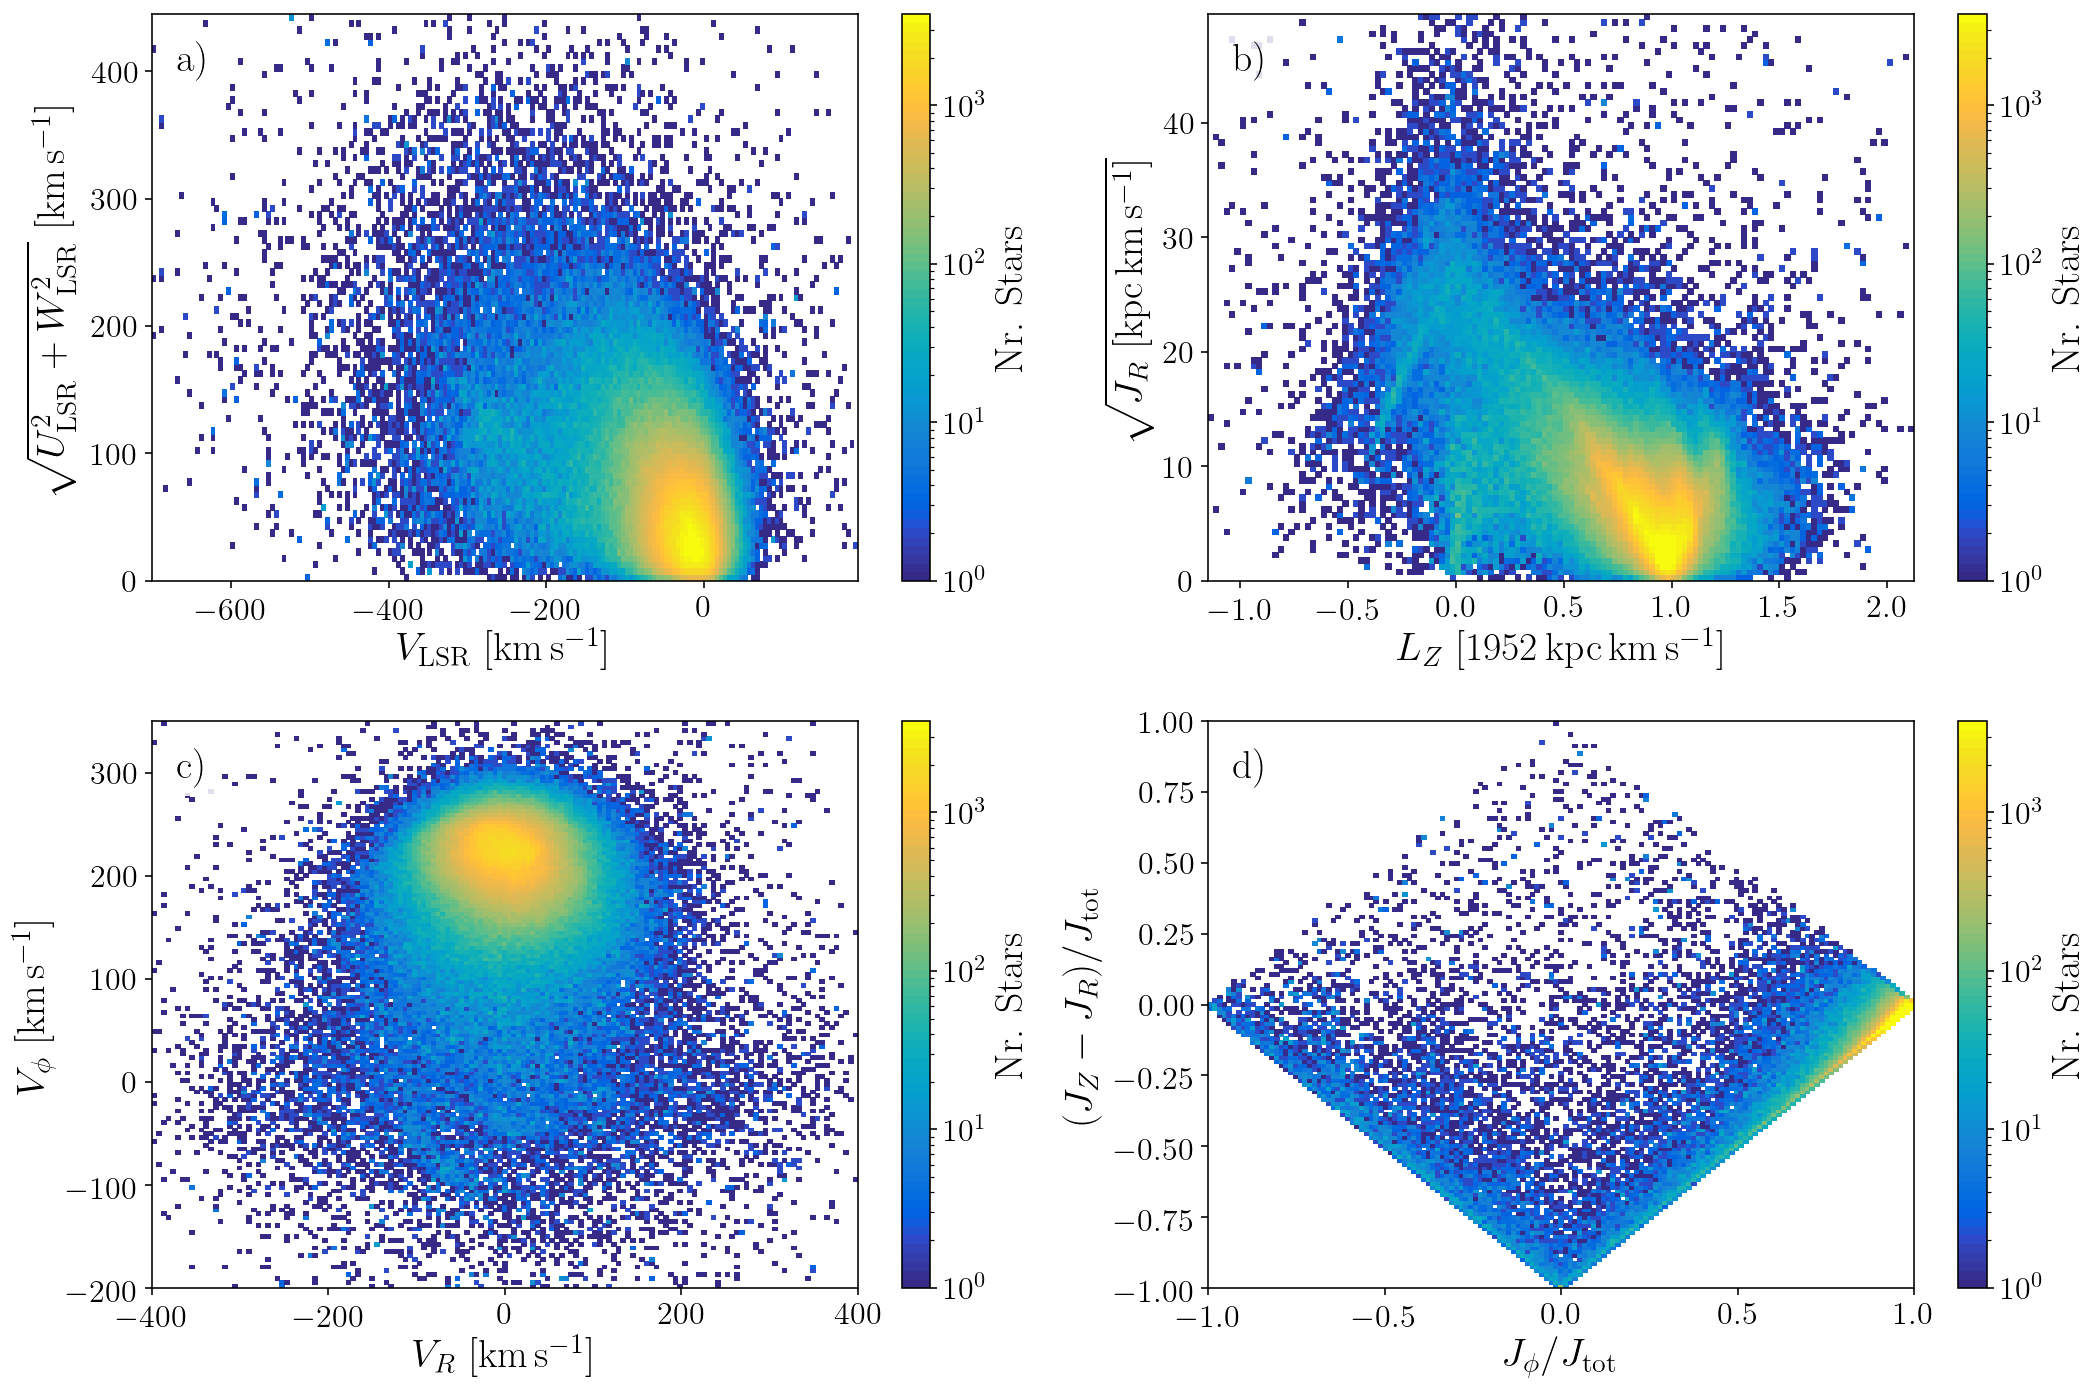

In [243]:
def plot_dynamics_overview():
    """
    This function plots the overview of GALAH+ DR3 stellar kinematics and dynamics
    """

    # First create a figure "f", with an array 2x2 grid of subplots "gs"
    f, gs = plt.subplots(2, 2, figsize=(15,10))

    # For the plotting, we can define keyword arguments, that the matplotlib
    kwargs_hist2d = dict(
        cmin=1,
        cmap=parula,
        norm=LogNorm(),
        rasterized=True
        )

    # You can iterate over the array entries, or just refer to them individually
    ax1 = gs[0,0]
    ax2 = gs[0,1]
    ax3 = gs[1,0]
    ax4 = gs[1,1]

    good_dynamics = np.isfinite(dr3_vac_dyn['V_LSR'])

    p1, x1, y1, s1 = ax1.hist2d(
        dr3_vac_dyn['V_LSR'][good_dynamics],
        np.sqrt(dr3_vac_dyn['U_LSR'][good_dynamics]**2. + dr3_vac_dyn['W_LSR'][good_dynamics]**2.),
        bins = (
            np.arange(-700,200,5),
            np.arange(0,450,5)
        ),
        **kwargs_hist2d
        )
    c1 = plt.colorbar(s1, ax=ax1)
    c1.set_label('Nr. Stars')

    p2, x2, y2, s2 = ax2.hist2d(
        dr3_vac_dyn['L_Z'][good_dynamics]/(_REFR0*_REFV0),
        np.sqrt(dr3_vac_dyn['J_R'][good_dynamics]),
        bins = (
            np.arange(-1.15,2.15,0.025),
            np.arange(0,50,0.5)
        ),
        **kwargs_hist2d
        )
    c2 = plt.colorbar(s2, ax=ax2)
    c2.set_label('Nr. Stars')

    # ellipse = matplotlib.patches.Ellipse(xy = (-1.5,3150), width = 0.7, height = 1000, angle = 0.05, lw = 3, fc='None', edgecolor = 'r')
    # ax1.add_artist(ellipse)
    # ax1.text(0.26,0.7,'LMC',transform=ax1.transAxes,color='r',fontsize=20)


    p3, x3, y3, s3 = ax3.hist2d(
        dr3_vac_dyn['vR_Rzphi'][good_dynamics],
        dr3_vac_dyn['vphi_Rzphi'][good_dynamics],
        bins = (
            np.linspace(-400,400,150),
            np.linspace(-200,350,150)
        ),
        **kwargs_hist2d
        )
    c3 = plt.colorbar(s3, ax=ax3)
    c3.set_label('Nr. Stars')

    p4, x4, y4, s4 = ax4.hist2d(
        dr3_vac_dyn['L_Z'][good_dynamics]/(np.abs(dr3_vac_dyn['J_R'][good_dynamics])+np.abs(dr3_vac_dyn['L_Z'][good_dynamics])+np.abs(dr3_vac_dyn['J_Z'][good_dynamics])),
        (dr3_vac_dyn['J_Z'][good_dynamics]-dr3_vac_dyn['J_R'][good_dynamics])/(np.abs(dr3_vac_dyn['J_R'][good_dynamics])+np.abs(dr3_vac_dyn['L_Z'][good_dynamics])+np.abs(dr3_vac_dyn['J_Z'][good_dynamics])),
        bins = (
            np.linspace(-1,1,150),
            np.linspace(-1,1,150)
        ),
        **kwargs_hist2d
        )
    c4 = plt.colorbar(s4, ax=ax4)
    c4.set_label('Nr. Stars')

    ax1.set_xlabel(r'$V_\text{LSR}~\mathrm{[km\,s^{-1}]}$')
    ax1.set_ylabel(r'$\sqrt{U_\text{LSR}^2 + W_\text{LSR}^2}~\mathrm{[km\,s^{-1}]}$')
    ax2.set_xlabel(r'$L_Z~\mathrm{[1952\,kpc\,km\,s^{-1}]}$')
    ax2.set_ylabel(r'$\sqrt{J_R~\mathrm{[kpc\,km\,s^{-1}]}}$')
    ax3.set_xlabel(r'$V_R~\mathrm{[km\,s^{-1}]}$')
    ax3.set_ylabel(r'$V_\phi~\mathrm{[km\,s^{-1}]}$')
    ax4.set_xlabel(r'$J_\phi/J_\text{tot}$')
    ax4.set_ylabel(r'$(J_Z-J_R)/J_\text{tot}$')

    props = dict(facecolor='w', edgecolor='None', alpha=0.85)   
    ax1.text(0.035,0.9,'a)',fontsize=20, transform=ax1.transAxes,bbox=props)
    ax2.text(0.035,0.9,'b)',fontsize=20, transform=ax2.transAxes,bbox=props)
    ax3.text(0.035,0.9,'c)',fontsize=20, transform=ax3.transAxes,bbox=props)
    ax4.text(0.035,0.9,'d)',fontsize=20, transform=ax4.transAxes,bbox=props)

    plt.tight_layout()
    plt.savefig('../../dr3_release_paper/figures/DR3_dynamics_overview.png',dpi=200,bbox_inches='tight')

plot_dynamics_overview()